# Yol Analizi

Yol analizi dışsal değişkenlerin içsel değişken üzerindeki etkilerini dolaysız, dolaylı ve toplam etki şeklinde tarif etmektedir. Bu analiz, üzerinde çalışılan modelin değişkenleri arasındaki nedensel ilişkilerin oklarla gösterildiği bir yol şeması yardımıyla açıklanmasına ve değişkenler arasındaki dolaylı ve dolaysız etki miktarlarının tahmin edilmesine olanak sağlayan çok değişkenli bir tekniktir

Yol analizini çoklu regresyondan ayıran temel fark, çoklu regresyon analizinde dikkate alınan varsayımlar altında bir bağımlı değişkenin tüm bağımsız değişkenler üzerinden analiz edilmesidir. Yol analizinde ise; bağımlı değişken, her bir bağımsız değişken üzerinden analiz edilmekte, yani birden fazla regresyon analizi yapılmaktadır.

* Ekonomik özgürlük kavramı, bir ulustaki vatandaşların özgürce ekonomik eylemde bulunma durumunu ifade eder. 
* Ulusal mutluluk ise vatandaşların kendi hayatlarına ilişkin puanlarına dayalı milli mutluluk değerini ifade etmektedir. Bu mutluluk çeşitli yaşam kalitesi faktörleriyle de ilişkilidir. 
* Devlete güven, diğer bir deyişle yolsuzluk algısı, ulusal mutluluğun ölçülmesinde kullanılan ve mutluluk üzerinde etkili olan faktörlerden biridir.

Ulusal mutluluk ile yolsuzluk algısı arasındaki ilişkide ekonomik özgürlüğün etkisi vardır. Yolsuzluk algısının artması sonucu ekonomik özgürlük azaldıkça ulusal mutlulukta azalacaktır. 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import seaborn as sns

## Veri Setinin Yüklenmesi

In [8]:
df = pd.read_excel("happiness.xlsx")
df.index = df.iloc[:,0]
df.index
df.head()
df = df.iloc[:,1:5]
df.head()
df = df.dropna()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, Afghanistan to Zimbabwe
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EF         142 non-null    float64
 1   CPI        142 non-null    float64
 2   GDP        142 non-null    float64
 3   Happiness  142 non-null    float64
dtypes: float64(4)
memory usage: 5.5+ KB


## Tanımsal İstatistikler

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EF,142.0,61.778648,8.912338,34.433333,55.925000,60.255556,68.427778,84.666667
CPI,142.0,44.399844,19.346327,13.333333,30.222222,38.444444,55.722222,89.444444
GDP,142.0,23456.804387,22087.751446,732.543000,5328.952500,16854.740000,36341.865000,106704.930000
Happiness,142.0,5.388998,0.577430,3.312809,5.099657,5.446579,5.714717,7.045279


In [6]:
df.head()

,EF,CPI,GDP,Happiness
Country,,,,
Afghanistan,51.600000,13.333333,2016.89,3.312809
Albania,65.677778,35.222222,13344.54,4.804204
Algeria,48.300000,35.000000,15439.92,5.382543
Argentina,48.355556,37.444444,20537.06,5.489591
Armenia,68.722222,37.333333,10176.09,5.293090


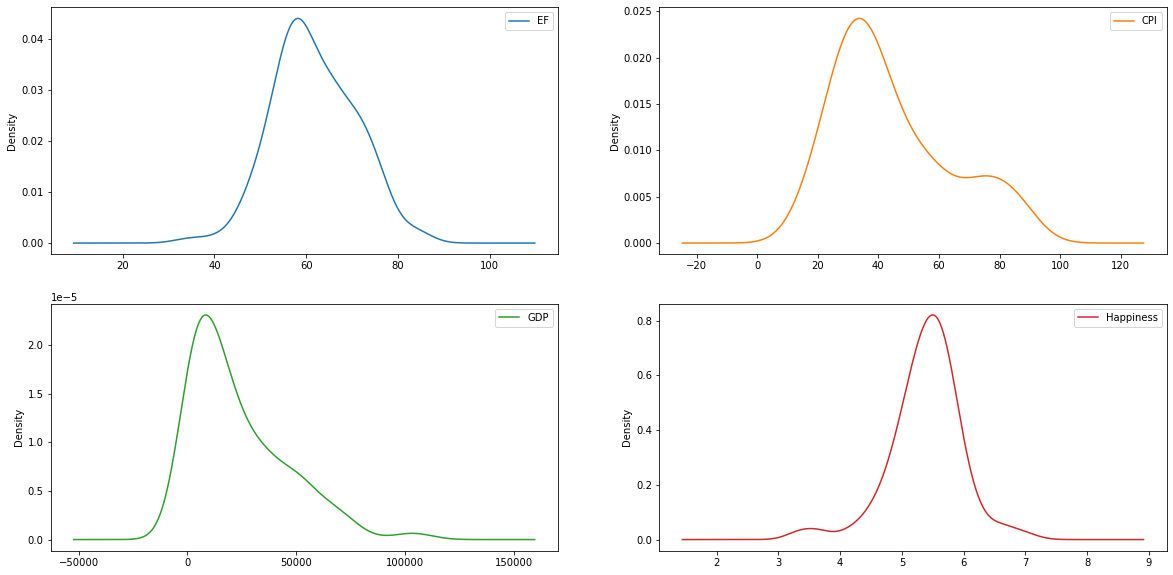

In [7]:
df.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(20, 10))
plt.show()

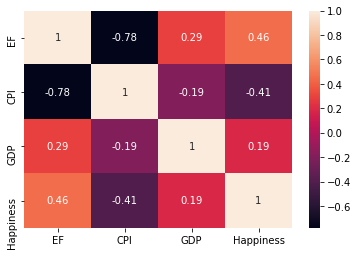

In [36]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.select_dtypes("number").columns] = scaler.fit_transform(df.select_dtypes("number"))

## Path Diyagramı

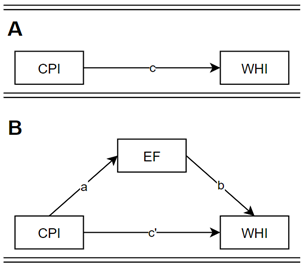

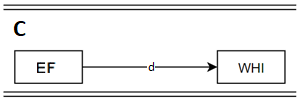

* Model A   :   WHI = i1 + c(CPI) + ε1                         
* Model B.1.:   EF  = i2 + a(CPI) + ε2                         
* Model B.2.:   WHI = i3 + c'(CPI) + b(EF) + ε3        
* Model C   :   WHI = i4 + d(EF) + ε4                         

Sonuçları daha doğru yorumlamak amacıyla CPI'ı -1 ile çarptık. Bunun nedeni, yüksek yolsuzluk algı endeksi değerinin yolsuzluk algısının azaldığını göstermesidir.

In [10]:
df["CPI"] = -1*df["CPI"]

# Model A

WHI = i1 + c(CPI) + ε1   

In [18]:
A_x = df["CPI"]
A_y = df["Happiness"]
lm = sm.OLS(A_y,A_x)
model_a = lm.fit()

In [19]:
print(model_a.summary())

                                 OLS Regression Results                                
Dep. Variable:              Happiness   R-squared (uncentered):                   0.166
Model:                            OLS   Adj. R-squared (uncentered):              0.160
Method:                 Least Squares   F-statistic:                              27.99
Date:                Mon, 22 Nov 2021   Prob (F-statistic):                    4.56e-07
Time:                        11:54:24   Log-Likelihood:                         -188.63
No. Observations:                 142   AIC:                                      379.3
Df Residuals:                     141   BIC:                                      382.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

* Model A'dan elde edilen sonuçlar incelendiğinde, yolsuzluk algısı ile ulusal mutluluk  arasındaki ilişki, p değeri 0,05'den küçük olduğundan %95 güven düzeyinde anlamlı çıkmıştır. Dolayısıyla Ulusal Mutluluk ile Yolsuzluk arasında %99 güven düzeyinde negatif ve anlamlı bir ilişki vardır.
* β katsayısının değeri dikkate alındığında, yolsuzlukta bir birimlik artışın ülke mutluluğunda %40'lik bir azalmaya neden olacağı şeklinde yorumlanabilir.

### Varsayım 1: Hata terimlerinin aldığı değerler normal dağılım özelliği göstermelidir.

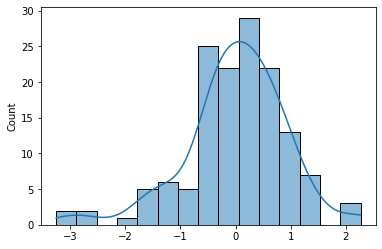

In [13]:
sns.histplot(x=model_a.resid, bins=15, kde=True)
plt.show()

In [14]:
from scipy.stats import shapiro
stat, p = shapiro(model_a.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Hatalar normal dağılıma uygun (H0 REDDEDİLEMEZ)')
else:
    print('Hatalar normal dağılıma uygun değil (H0 RED)')

Statistics=0.954, p=0.000
Hatalar normal dağılıma uygun değil (H0 RED)


### Varsayım 2: Hata terimlerinin varyansı sabittir. 


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  0.724172
p-value                        0.394779
f-value                        0.717632
f p-value                      0.398368

 Goldfeld-Quandt test ----
                value
F statistic  0.923321
p-value      0.629339

 Residuals plots ----


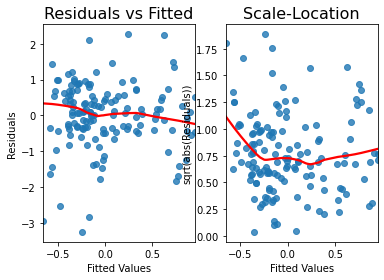

In [17]:
import statsmodels.stats.api as sms
def homoscedasticity_test(model_a):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model_a.predict()
    resids = model_a.resid
    resids_standardized = model_a.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model_a.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model_a.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model_a)

Yapılan testlere göre H0 reddedilemeyeceğinden değişen varyans sorunumuz yoktur.

# Model B.1.

EF  = i2 + a(CPI) + ε2

In [20]:
B1_x = df["CPI"]
B1_y = df["EF"]
lm = sm.OLS(B1_y,B1_x)
model_b1 = lm.fit()

In [21]:
print(model_b1.summary())

                                 OLS Regression Results                                
Dep. Variable:                     EF   R-squared (uncentered):                   0.607
Model:                            OLS   Adj. R-squared (uncentered):              0.604
Method:                 Least Squares   F-statistic:                              217.4
Date:                Mon, 22 Nov 2021   Prob (F-statistic):                    2.34e-30
Time:                        11:54:39   Log-Likelihood:                         -135.25
No. Observations:                 142   AIC:                                      272.5
Df Residuals:                     141   BIC:                                      275.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

* Model B.1'in sonuçları incelendiğinde, yolsuzluk algısı ile ekonomik özgürlük arasındaki ilişki,  %95 güven düzeyinde negatif ve anlamlı çıkmıştır. 
* β katsayısının değeri dikkate alındığında, yolsuzluktaki bir birimlik artışın ekonomik özgürlükte %77'lik bir azalmaya neden olacağı şeklinde yorumlanabilir. 

### Varsayım 1: Hata terimlerinin aldığı değerler normal dağılım özelliği göstermelidir.

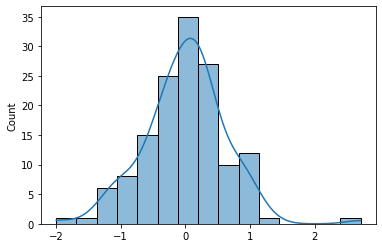

In [20]:
sns.histplot(x=model_b1.resid, bins=15, kde=True)
plt.show()

In [21]:
from scipy.stats import shapiro
stat, p = shapiro(model_b1.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Hatalar normal dağılıma uygun (H0 REDDEDİLEMEZ)')
else:
    print('Hatalar normal dağılıma uygun değil (H0 RED)')

Statistics=0.973, p=0.007
Hatalar normal dağılıma uygun değil (H0 RED)



 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  3.184233
p-value                        0.074352
f-value                        3.211397
f p-value                      0.075287

 Goldfeld-Quandt test ----
                value
F statistic  0.691913
p-value      0.935726

 Residuals plots ----


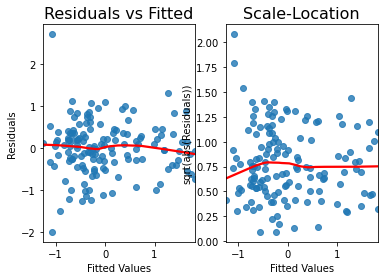

In [23]:
import statsmodels.stats.api as sms
def homoscedasticity_test(model_a):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model_b1.predict()
    resids = model_b1.resid
    resids_standardized = model_b1.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model_b1.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model_b1.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model_b1)

Yapılan testlere göre H0 reddedilemeyeceğinden değişen varyans sorunumuz yoktur.

# Model C

WHI = i4 + d(EF) + ε4  

In [22]:
C_x = df["EF"]
C_y = df["Happiness"]
lm = sm.OLS(C_y,C_x)
model_C = lm.fit()

In [23]:
print(model_C.summary())

                                 OLS Regression Results                                
Dep. Variable:              Happiness   R-squared (uncentered):                   0.209
Model:                            OLS   Adj. R-squared (uncentered):              0.203
Method:                 Least Squares   F-statistic:                              37.26
Date:                Mon, 22 Nov 2021   Prob (F-statistic):                    9.46e-09
Time:                        11:54:47   Log-Likelihood:                         -184.84
No. Observations:                 142   AIC:                                      371.7
Df Residuals:                     141   BIC:                                      374.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

* Model C'den elde edilen sonuçlar incelendiğinde, ekonomik özgürlük ile ulusal mutluluk arasındaki ilişki, %95 güven düzeyinde anlamlıdır. 
* β katsayısının değeri dikkate alındığında ekonomik özgürlükteki bir birimlik artışın ulusal mutlulukta %45'lik bir artışa neden olacağı şeklinde yorumlanabilir. 

### Varsayım 1: Hata terimlerinin aldığı değerler normal dağılım özelliği göstermelidir.

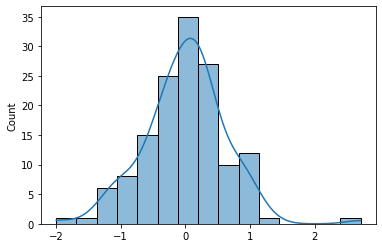

In [26]:
sns.histplot(x=model_b1.resid, bins=15, kde=True)
plt.show()

In [27]:
from scipy.stats import shapiro
stat, p = shapiro(model_b1.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Hatalar normal dağılıma uygun (H0 REDDEDİLEMEZ)')
else:
    print('Hatalar normal dağılıma uygun değil (H0 RED)')

Statistics=0.973, p=0.007
Hatalar normal dağılıma uygun değil (H0 RED)



 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  1.486168
p-value                        0.222812
f-value                        1.480734
f p-value                      0.225707

 Goldfeld-Quandt test ----
                value
F statistic  0.746938
p-value      0.885959

 Residuals plots ----


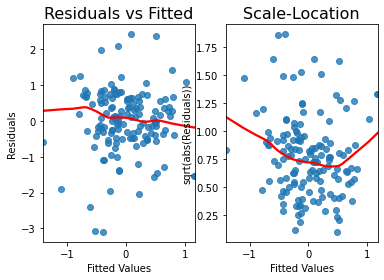

In [29]:
import statsmodels.stats.api as sms
def homoscedasticity_test(model_a):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model_C.predict()
    resids = model_C.resid
    resids_standardized = model_C.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model_C.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model_C.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model_C)

Yapılan testlere göre H0 reddedilemeyeceğinden değişen varyans sorunumuz yoktur.

# Model B.2.

WHI = i3 + c'(CPI) + b(EF) + ε3 

In [24]:
B2_x = df.drop(["GDP", "Happiness"], axis=1)
B2_y = df["Happiness"]
lm = sm.OLS(B2_y,B2_x)
model_b2= lm.fit()

In [25]:
print(model_b2.summary())

                                 OLS Regression Results                                
Dep. Variable:              Happiness   R-squared (uncentered):                   0.216
Model:                            OLS   Adj. R-squared (uncentered):              0.204
Method:                 Least Squares   F-statistic:                              19.24
Date:                Mon, 22 Nov 2021   Prob (F-statistic):                    4.14e-08
Time:                        11:55:00   Log-Likelihood:                         -184.25
No. Observations:                 142   AIC:                                      372.5
Df Residuals:                     140   BIC:                                      378.4
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

* Model B.2'den elde edilen sonuçlar. incelendiğinde, yolsuzluk algısı ve ekonomik özgürlüğün ulusal mutlulukla ilişkisine ekonomik özgürlük dahil edildiğinde yolsuzluk algısının ulusal mutluluk üzerindeki etkisinin azaldığı, bir başka deyişle geçerliliğinin azaldığı görülmektedir. Ancak, bu çok değişkenli regresyon analizinde ekonomik özgürlük (EF) anlamlı görünmektedir. Buradan ekonomik özgürlüğün yolsuzluk algısının ulusal mutluluk üzerindeki etkisinde aracılık etkisinin olduğu söylenebilir. 
* Bu bulgunun doğruluğunu daha iyi kanıtlamak için Sobel Testi sonuçları incelenmelidir. 
* Dolayısıyla, yolsuzluk algısının ulusal mutluluğa etkisinde ekonomik özgürlüğün %95 güven düzeyinde anlamlı aracılık etkisi olduğu söylenebilir.

## Varsayım 1: Değişkenler arasında çoklu doğrusallık sorunu olmamalıdır. 

In [26]:
#vif
X = B2_x
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X.columns).T

,EF,CPI
vif,2.541951,2.541951


## Varsayım 2: Hata terimlerinin aldığı değerler normal dağılım özelliği göstermelidir.

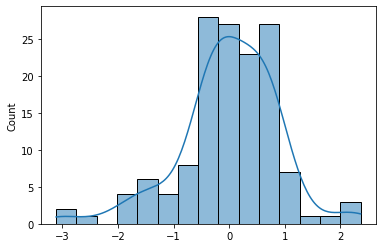

In [33]:
sns.histplot(x=model_b2.resid, bins=15, kde=True)
plt.show()

In [34]:
# normal dağılım testi
from scipy.stats import shapiro
stat, p = shapiro(model_b2.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Hatalar normal dağılıma uygun (H0 REDDEDİLEMEZ)')
else:
    print('Hatalar normal dağılıma uygun değil (H0 RED)')

Statistics=0.955, p=0.000
Hatalar normal dağılıma uygun değil (H0 RED)


## Varsayım 3: Değişen Varyans Sorunu sorunu olmamalıdır.


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  2.136611
p-value                        0.343590
f-value                        1.061711
f p-value                      0.348651

 Goldfeld-Quandt test ----
                value
F statistic  0.770314
p-value      0.857802

 Residuals plots ----


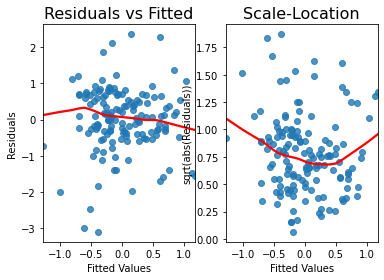

In [35]:
import statsmodels.stats.api as sms
def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model_b2.predict()
    resids = model_b2.resid
    resids_standardized = model_b2.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model_b2.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model_b2.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(model_b2)

### Yol Diyagramı

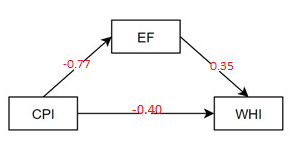

### Doğrudan Etki

Yol şemasındaki her bir dolaysız etki, eğer hiçbir etki arada olan değişkenler boyunca iletilmiyorsa, bağımsız değişkendeki değişime bağlı olarak değişen bağımlı değişkendeki değişim miktarına göre yorumlanmalıdır. 

Örneğin, (CPI)ın (EF) üzerindeki dolaysız etkisi P21 = -0.77 dir. Bu, CPI da ki bir birimlik bir değişikliğin EF te -0.77 birimlik bir değişime yol açtığı anlamına gelir.

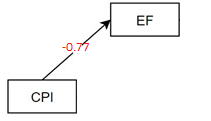

### Dolaylı Etki

Yolsuzluk algısının Ulusal Mutluluk üzerindeki dolaylı etkisi -0.77 x 0.35 = -0.26

Yolsuzluk algısındaki 1 birimlik değişikliğin ekonomik özgürlük üzerinden ulusal mutlulukta -%26 lik bir değişime neden olur şeklinde yorumlanır.

In [4]:
(-0.77*0.35)

-0.26949999999999996

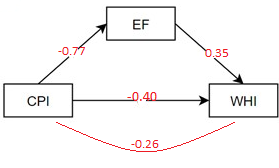

### Toplam Etki

In [3]:
-0.4+(-0.77*0.35)

-0.6695

Toplam etki = -0.4+(-0.77*0.35) = -0.66

Bu durum şöyle yorumlanır. Modeldeki diğer tüm değişkenler sabit ise WHI de CPI da ki 1 birimlik değişimden kaynaklanan -%66 birimlik değişiklik beklenir.

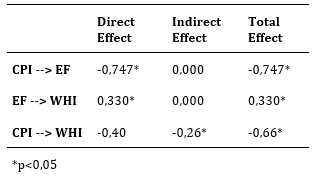

# ____________________________________________________________________

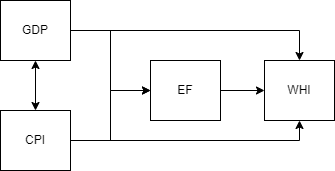

YOLef = p13*GDP + p23*CPI + p3e3

In [11]:
X1 = df.drop(["Happiness", "EF"], axis=1)
y1 = df["EF"]
X1 = sm.add_constant(X1)
lm = sm.OLS(y1, X1)
model_ef= lm.fit()

In [12]:
print(model_ef.summary())

                            OLS Regression Results                            
Dep. Variable:                     EF   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     116.9
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.64e-30
Time:                        10:36:06   Log-Likelihood:                -131.43
No. Observations:                 142   AIC:                             268.9
Df Residuals:                     139   BIC:                             277.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.955e-16      0.052   7.64e-15      1.0

In [13]:
import pingouin as pg

YOLwhi = p14*GDP + p24*CPI + p34ef + p3e3

In [14]:
X2 = df.drop(["Happiness"], axis=1)
y2 = df["Happiness"]
X2 = sm.add_constant(X2)
lm = sm.OLS(y2, X2)
model_whi= lm.fit()

In [15]:
print(model_whi.summary())

                            OLS Regression Results                            
Dep. Variable:              Happiness   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     12.96
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           1.65e-07
Time:                        10:36:21   Log-Likelihood:                -183.87
No. Observations:                 142   AIC:                             375.7
Df Residuals:                     138   BIC:                             387.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.96e-16      0.075   2.61e-15      1.0

C:\Users\berke\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [16]:
X3 = df["GDP"]
y3 = df["CPI"]
X3 = sm.add_constant(X3)
lm = sm.OLS(y3, X3)
model_cpi= lm.fit()

In [17]:
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     5.151
Date:                Mon, 22 Nov 2021   Prob (F-statistic):             0.0248
Time:                        10:36:22   Log-Likelihood:                -198.92
No. Observations:                 142   AIC:                             401.8
Df Residuals:                     140   BIC:                             407.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.245e-17      0.083  -7.52e-16      1.0

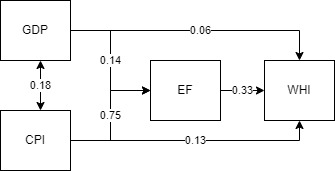

In [5]:
0.14*0.33

0.046200000000000005

GDP'nin Ulusal Mutluluk üzerindeki dolaylı etkisi %4

GDP'deki 1 birimlik değişikliğin ekonomik özgürlük üzerinden ulusal mutlulukta %4 lük bir değişime neden olur şeklinde yorumlanır.